In [0]:
%pip install openpyxl

Looking in indexes: https://binarios.intranet.bb.com.br/artifactory/api/pypi/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/250.9 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 122.9/250.9 kB 6.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python

Leitura do arquivo com índices SPI acumulados para cidade de Catalão: [ic_lamfo_spi_commodities/spi.xlsx](https://github.com/Pesquisa-UFCAT/ic_lamfo_spi_commodities/blob/main/spi.xlsx)


In [0]:
import pandas as pd

df = pd.read_excel(
    "/Workspace/Users/lucas.cusinato@bb.com.br/spi/spi.xlsx",
    sheet_name="Sheet1"
)
df["AnoMes"] = pd.to_datetime(df["AnoMes"], format="%Y-%m")
display(df)

Leitura do arquivo tratado com preços de milho em Goiás: [ic_lamfo_spi_commodities/PrecosGraos/Precos_Produtor_Tratado.xlsx](https://github.com/Pesquisa-UFCAT/ic_lamfo_spi_commodities/blob/main/PrecosGraos/Precos_Produtor_Tratado.xlsx)

In [0]:
df_milho = pd.read_excel(
    "/Workspace/Users/lucas.cusinato@bb.com.br/spi/Precos_Produtor_Tratado.xlsx",
    sheet_name="Milho_GO"
)
df_milho["Data"] = pd.to_datetime(df_milho["Data"], format="%m/%Y")
display(df_milho)

In [0]:
df_merged = df_milho.merge(df, left_on="Data", right_on="AnoMes", how="inner")
display(df_merged)

Visualização da série de preços de milho em Goiás por Kg em dólares.

Text(0, 0.5, 'Preço do Kg em dólares')

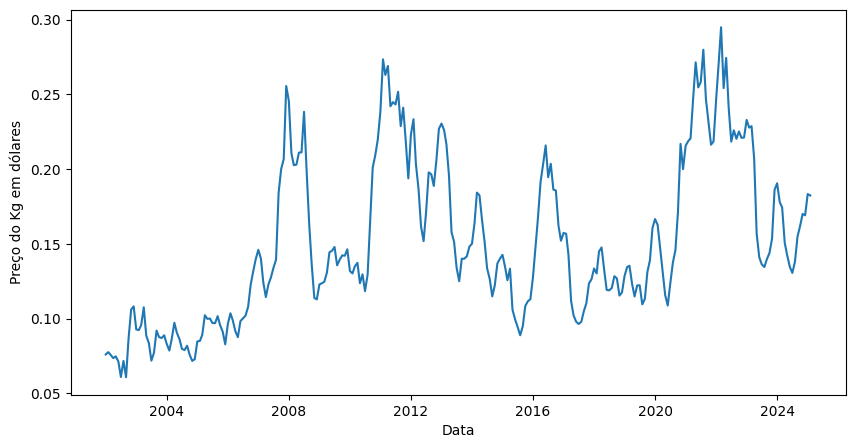

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_merged["Data"], df_merged["Preco_Kg_Dolar"])
plt.xlabel("Data")
plt.ylabel("Preço do Kg em dólares")

Criação de variáveis com preço n meses antes, para auxiliar na predição.

In [0]:
import numpy as np

df_merged["Preco_Kg_Dolar_shift1"] = df_merged["Preco_Kg_Dolar"].shift(1)
df_merged["Preco_Kg_Dolar_shift2"] = df_merged["Preco_Kg_Dolar"].shift(2)
df_merged["Preco_Kg_Dolar_shift3"] = df_merged["Preco_Kg_Dolar"].shift(3)
df_merged["Preco_Kg_Dolar_shift6"] = df_merged["Preco_Kg_Dolar"].shift(6)
df_merged["Preco_Kg_Dolar_shift12"] = df_merged["Preco_Kg_Dolar"].shift(12)

df_merged["log_retorno_Preco_Kg_Dolar"] = np.log(df_merged["Preco_Kg_Dolar"] / df_merged["Preco_Kg_Dolar"].shift(1))
df_merged["log_retorno_Preco_Kg_Dolar_shift1"] = df_merged["log_retorno_Preco_Kg_Dolar"].shift(1)
df_merged["log_retorno_Preco_Kg_Dolar_shift2"] = df_merged["log_retorno_Preco_Kg_Dolar"].shift(2)
df_merged["log_retorno_Preco_Kg_Dolar_shift3"] = df_merged["log_retorno_Preco_Kg_Dolar"].shift(3)
df_merged["log_retorno_Preco_Kg_Dolar_shift6"] = df_merged["log_retorno_Preco_Kg_Dolar"].shift(6)
df_merged["log_retorno_Preco_Kg_Dolar_shift12"] = df_merged["log_retorno_Preco_Kg_Dolar"].shift(12)
display(df_merged)

Data Produto UF Preço_Saca_Real Preço_Kg_Real Dolar Preco_Saca_Dolar Preco_Kg_Dolar AnoMes PrecipitacaoMensal SPI_1 PrecipitacaoAcum_2 SPI_2 PrecipitacaoAcum_3 SPI_3 PrecipitacaoAcum_6 SPI_6 PrecipitacaoAcum_12 SPI_12 PrecipitacaoAcum_24 SPI_24 Preco_Kg_Dolar_shift1 Preco_Kg_Dolar_shift2 Preco_Kg_Dolar_shift3 Preco_Kg_Dolar_shift6 Preco_Kg_Dolar_shift12 log_retorno_Preco_Kg_Dolar log_retorno_Preco_Kg_Dolar_shift1 log_retorno_Preco_Kg_Dolar_shift2 log_retorno_Preco_Kg_Dolar_shift3 log_retorno_Preco_Kg_Dolar_shift6 log_retorno_Preco_Kg_Dolar_shift12 2002-01-01T00:00:00Z Milho GO 11.03 0.18383333333333332 2.4183 4.561055286771699 0.07601758811286165 2002-01-01T00:00:00Z 230.4 -0.2682077860027711 506.2000000000002 -0.1443595445125826 737.3000000000004 0.05590317811717741 913.3000000000002 0.05569118888162787 1364.5 -0.3025657729992149 2871.0 -0.03800528924724754 null null null null null null null null null null null 2002-02-01T00:00:00Z Milho GO 10.93 0.18216666666666667 2.3482 4.654629077591347 0.07757715129318912 2002-02-01T00:00:00Z 351.6 1.15978018661773 582.0000000000002 0.6477307454050872 857.8000000000004 0.647425838296851 1258.9 0.7830524586641981 1662.0 0.8787588395697682 2883.4 0.03492283404141894 0.07601758811286165 null null null null 0.020308205684589832 null null null null null 2002-03-01T00:00:00Z Milho GO 10.55 0.17583333333333334 2.3236 4.540368393871579 0.07567280656452632 2002-03-01T00:00:00Z 168.9 -0.00885662743200482 520.5000000000002 0.921782362862092 750.9000000000004 0.4562776133653595 1365.9 0.5938837947510205 1513.3 0.3973884056757773 2835.5 -0.1359003550401895 0.07757715129318912 0.07601758811286165 null null null -0.024854072188637662 0.020308205684589832 null null null null 2002-04-01T00:00:00Z Milho GO 10.43 0.17383333333333334 2.3625 4.414814814814815 0.07358024691358026 2002-04-01T00:00:00Z 48.7 -0.4610264565262822 217.6000000000002 -0.3309785287439315 569.2000000000005 0.7060439915119471 1306.5 0.529452423368314 1521.2 0.4403040137199387 2817.1 -0.1881950487589952 0.07567280656452632 0.07757715129318912 0.07601758811286165 null null -0.02804226415891488 -0.024854072188637662 0.020308205684589832 null null null 2002-05-01T00:00:00Z Milho GO 11.31 0.1885 2.522 4.484536082474228 0.07474226804123713 2002-05-01T00:00:00Z 42.5 0.7103045831997402 91.20000000000023 -0.152234119215209 260.1000000000004 -0.1939676192456122 1117.9 0.4341266579967981 1525.0 0.478282594130004 2859.6 -0.04649703652401999 0.07358024691358026 0.07567280656452632 0.07757715129318912 null null 0.01566916395838109 -0.02804226415891488 -0.024854072188637662 0.020308205684589832 null null 2002-06-01T00:00:00Z Milho GO 12.17 0.20283333333333334 2.8444 4.2785824778512165 0.07130970796418695 2002-06-01T00:00:00Z 3.6 0.2131782315254918 46.10000000000023 0.4919666681844836 94.80000000000045 -0.2993820225098435 845.7000000000002 0.3156618236360968 1528.6 0.4820951775531943 2863.2 -0.006385963726778997 0.07474226804123713 0.07358024691358026 0.07567280656452632 null null -0.04701329461309129 0.01566916395838109 -0.02804226415891488 -0.024854072188637662 null null 2002-07-01T00:00:00Z Milho GO 12.54 0.209 3.4285 3.657576199504156 0.06095960332506927 2002-07-01T00:00:00Z 1.0 0.395792802759944 4.600000000000227 -0.1579617817810536 47.10000000000046 0.3190744610277427 616.3000000000002 0.6656555822546377 1529.6 0.5240724721315303 2847.5 -0.02402158795932476 0.07130970796418695 0.07474226804123713 0.07358024691358026 0.07601758811286165 null -0.1568210705097176 -0.04701329461309129 0.01566916395838109 -0.02804226415891488 null null 2002-08-01T00:00:00Z Milho GO 13.0 0.21666666666666667 3.0223 4.301359891473381 0.07168933152455635 2002-08-01T00:00:00Z 22.1 0.9607795723037656 23.10000000000023 0.6241330593528102 26.70000000000046 0.3563000859101071 286.8000000000002 -0.2200128979830477 1545.7 0.5986418846833099 2848.8 -0.01622000001378228 0.06095960332506927 0.07130970796418695 0.07474226804123713 0.07757715129318912 null 0.16213053907034125 -0.1568

Ajuste de regressão com processo gaussiano para prever o preço do milho utilizando as variáveis de preços nos meses anteriores

Medidas de erros e previsões do modelo foram apuradas para os 20% dos dados mais recentes, não utilizados no treino do modelo.

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run spiffy-colt-245 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/3ad0500a329c419e8dc591f1f07bf3dd
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0003, R2: 0.8393


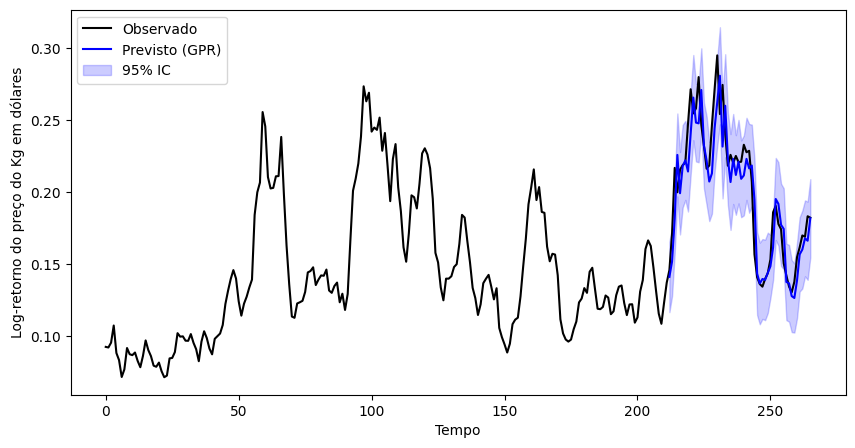

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic, WhiteKernel, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Seleciona as features e target
features = ["Preco_Kg_Dolar_shift1", "Preco_Kg_Dolar_shift2", "Preco_Kg_Dolar_shift3", "Preco_Kg_Dolar_shift6", "Preco_Kg_Dolar_shift12"]
X = df_merged[features].values
y = df_merged["Preco_Kg_Dolar"].values

# Remove linhas com NaN
mask = ~pd.isnull(X).any(axis=1) & ~pd.isnull(y)
X = X[mask]
y = y[mask]

# Separa treino e teste (20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define kernels conforme exemplo do scikit-learn
long_term_trend_kernel = C(1.0, (1e-2, 1e2)) * RBF(length_scale=50.0, length_scale_bounds=(1.0, 1e3))
seasonal_kernel = C(1.0, (1e-2, 1e2)) * ExpSineSquared(length_scale=1.0, periodicity=12.0, length_scale_bounds=(1e-2, 1e2), periodicity_bounds=(1.0, 100.0))
irregularities_kernel = C(0.1, (1e-3, 1e1)) * RationalQuadratic(length_scale=1.0, alpha=1.0)
noise_kernel = WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1e1))

kernel = long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel

# Ajusta o modelo
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
gpr.fit(X_train, y_train)

# Previsão
y_pred, y_std = gpr.predict(X_test, return_std=True)

# Avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}, R2: {r2:.4f}")

# Visualização
plt.figure(figsize=(10,5))
plt.plot(range(len(y)), y, 'k-', label="Observado")
plt.plot(range(len(X_train), len(y)), y_pred, 'b-', label="Previsto (GPR)")
plt.fill_between(range(len(X_train), len(y)), y_pred - 1.96*y_std, y_pred + 1.96*y_std, color='blue', alpha=0.2, label="95% IC")
plt.xlabel("Tempo")
plt.ylabel("Log-retorno do preço do Kg em dólares")
plt.legend()
plt.show()

O modelo apresenta bom ajuste, mas sempre necessita do preço no mês imediatamente anterior (Preco_Kg_Dolar_shift2) para prever o seguinte.

Um horizonte de predição de dois meses já traria muito mais utilidade para o modelo, visto que leva-se um tempo até consolidar os preços de cada mês (por UF). Além disso, ampliar o horizonte de predição auxiliaria nos processos de negociação desses grãos. Nesse sentido, tentamos ajustar esse modelo sem a variável Preco_Kg_Dolar_shift2 do mês imediatamente anterior, mas a qualidade das predições reduz significativamente:

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run placid-squirrel-337 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/e8f877857ccb4a49ba0c3dc2857cae29
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0012, R2: 0.3910


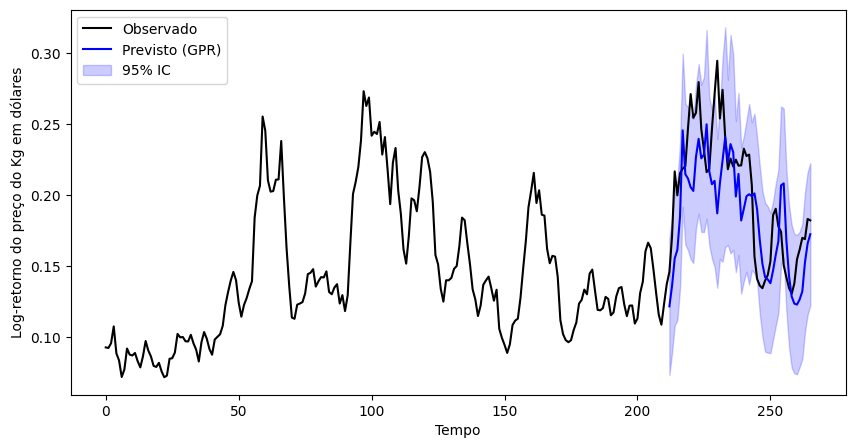

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic, WhiteKernel, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Seleciona as features e target
features = ["Preco_Kg_Dolar_shift2", "Preco_Kg_Dolar_shift3", "Preco_Kg_Dolar_shift6", "Preco_Kg_Dolar_shift12"]
X = df_merged[features].values
y = df_merged["Preco_Kg_Dolar"].values

# Remove linhas com NaN
mask = ~pd.isnull(X).any(axis=1) & ~pd.isnull(y)
X = X[mask]
y = y[mask]

# Separa treino e teste (20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define kernels conforme exemplo do scikit-learn
long_term_trend_kernel = C(1.0, (1e-2, 1e2)) * RBF(length_scale=50.0, length_scale_bounds=(1.0, 1e3))
seasonal_kernel = C(1.0, (1e-2, 1e2)) * ExpSineSquared(length_scale=1.0, periodicity=12.0, length_scale_bounds=(1e-2, 1e2), periodicity_bounds=(1.0, 100.0))
irregularities_kernel = C(0.1, (1e-3, 1e1)) * RationalQuadratic(length_scale=1.0, alpha=1.0)
noise_kernel = WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1e1))

kernel = long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel

# Ajusta o modelo
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
gpr.fit(X_train, y_train)

# Previsão
y_pred, y_std = gpr.predict(X_test, return_std=True)

# Avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}, R2: {r2:.4f}")

# Visualização
plt.figure(figsize=(10,5))
plt.plot(range(len(y)), y, 'k-', label="Observado")
plt.plot(range(len(X_train), len(y)), y_pred, 'b-', label="Previsto (GPR)")
plt.fill_between(range(len(X_train), len(y)), y_pred - 1.96*y_std, y_pred + 1.96*y_std, color='blue', alpha=0.2, label="95% IC")
plt.xlabel("Tempo")
plt.ylabel("Log-retorno do preço do Kg em dólares")
plt.legend()
plt.show()

Para compensar a redução na capacidade preditiva do modelo ao se retirar os preços do mês imediatamente anterior, incluímos como covariáveis na regressão os índices de precipitação SPI acumulados em diferentes períodos. 

Tentamos modelar os preços incluindo os índices de precipitação SPI acumulados em diferentes períodos, mas a inclusão direta desses índices como covariáveis não aprimorou a qualidade do ajuste do modelo. Todas as tentativas de ajuste incluindo o histórico SPI tiveram performance preditiva inferior no período de teste futuro - 20% dos dados mais recentes.

A seguir ajustamos trocando a variável do preço do mês anterior pelo índice acumulado SPI do mesmo mês:

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/

🏃 View run valuable-stag-207 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/f0f400fef2e4402c9707a4afa7e057cf
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0013, R2: 0.3724


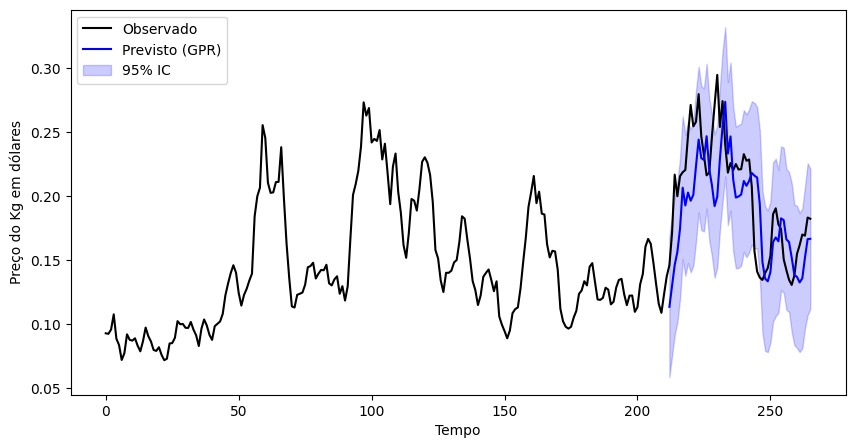

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic, WhiteKernel, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Seleciona as features e target
features = ["SPI_1_shift", "Preco_Kg_Dolar_shift3", "Preco_Kg_Dolar_shift6", "Preco_Kg_Dolar_shift12"]
X = df_merged[features].values
y = df_merged["Preco_Kg_Dolar"].values

# Remove linhas com NaN
mask = ~pd.isnull(X).any(axis=1) & ~pd.isnull(y)
X = X[mask]
y = y[mask]

# Separa treino e teste (20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define kernels conforme exemplo do scikit-learn
long_term_trend_kernel = C(1.0, (1e-2, 1e2)) * RBF(length_scale=50.0, length_scale_bounds=(1.0, 1e3))
seasonal_kernel = C(1.0, (1e-2, 1e2)) * ExpSineSquared(length_scale=1.0, periodicity=12.0, length_scale_bounds=(1e-2, 1e2), periodicity_bounds=(1.0, 100.0))
irregularities_kernel = C(0.1, (1e-3, 1e1)) * RationalQuadratic(length_scale=1.0, alpha=1.0)
noise_kernel = WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1e1))

kernel = long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel

# Ajusta o modelo
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
gpr.fit(X_train, y_train)

# Previsão
y_pred, y_std = gpr.predict(X_test, return_std=True)

# Avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}, R2: {r2:.4f}")

# Visualização
plt.figure(figsize=(10,5))
plt.plot(range(len(y)), y, 'k-', label="Observado")
plt.plot(range(len(X_train), len(y)), y_pred, 'b-', label="Previsto (GPR)")
plt.fill_between(range(len(X_train), len(y)), y_pred - 1.96*y_std, y_pred + 1.96*y_std, color='blue', alpha=0.2, label="95% IC")
plt.xlabel("Tempo")
plt.ylabel("Preço do Kg em dólares")
plt.legend()
plt.show()

Novos modelos incluindo, uma a uma, todas as colunas de índice SPI acumulado disponíveis na planilha inicial, mantendo todas as variáveis de preços nos meses anteriores. As medidas de erro não tiveram alteração significativa em nenhuma das tentativas de inclusão de índice SPI acumulado:

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/

🏃 View run amusing-worm-242 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/3eca8d60dafe470a94b845f45db33f17
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0003, R2: 0.8356


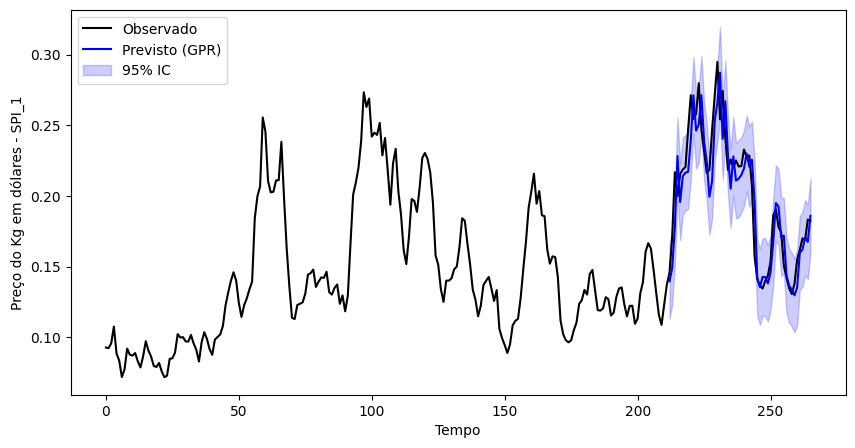

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run languid-robin-456 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/113953623e574e288020f6b0ed4f25af
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0003, R2: 0.8332


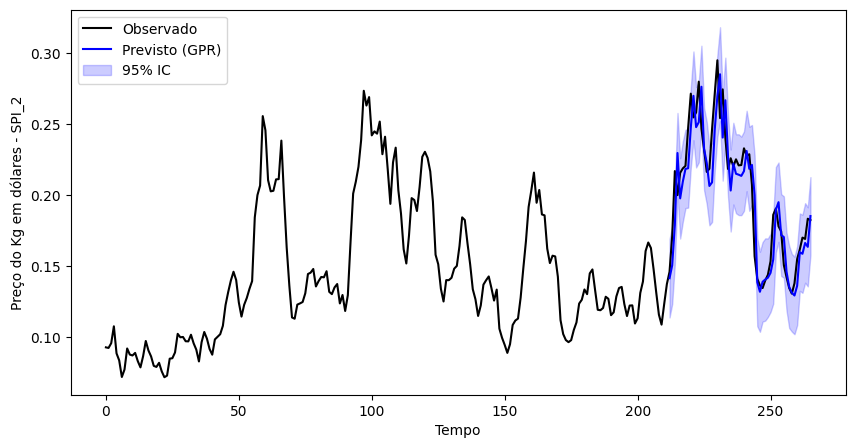

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run languid-panda-228 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/e999781f8d6d463a99aef49872c41086
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0003, R2: 0.8304


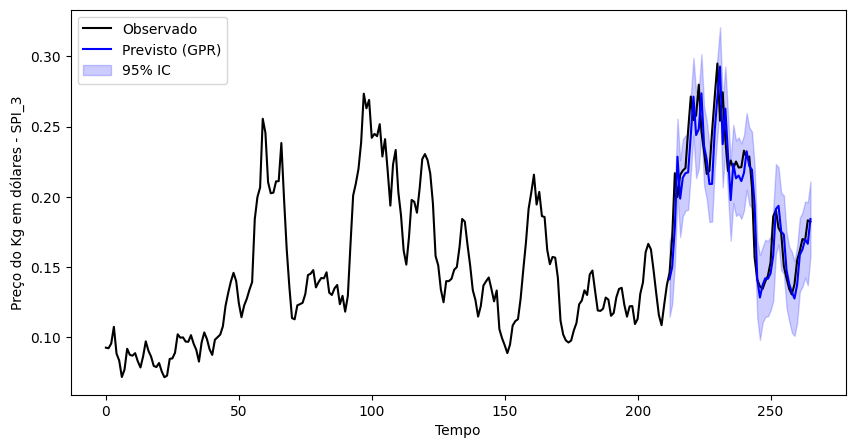

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/

🏃 View run flawless-dog-16 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/1ffd468c96a445f99cf3caf530db09a3
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0004, R2: 0.8075


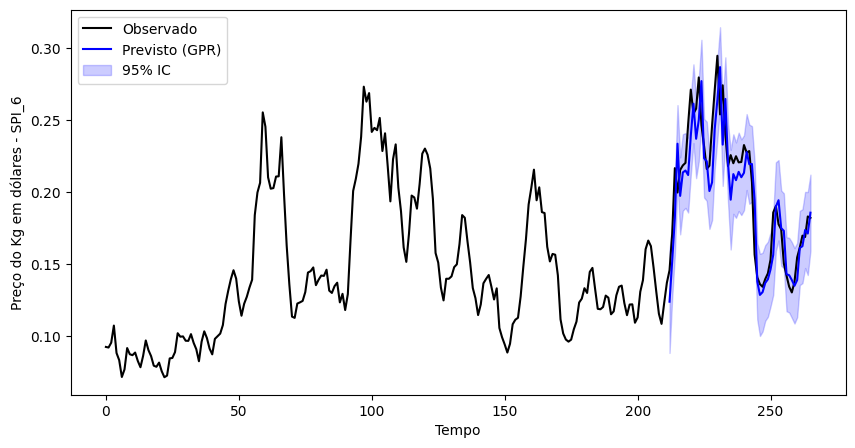

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run nimble-conch-974 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/32664cb7e2d546de84b352e1907bd858
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0004, R2: 0.8136


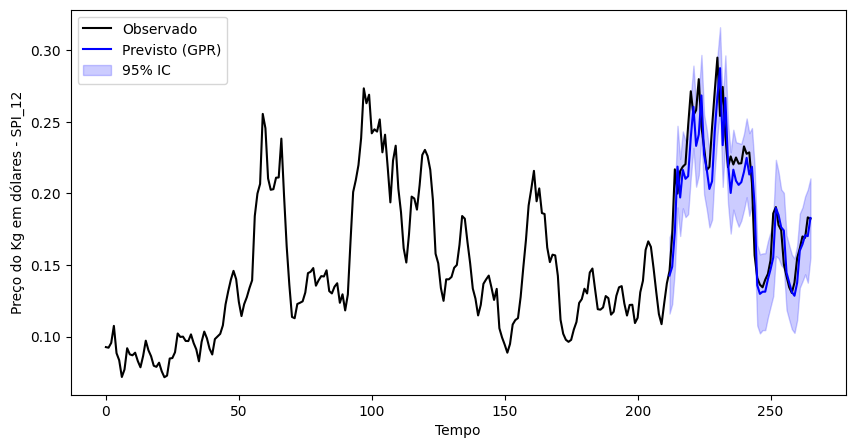

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run capricious-fly-96 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/dd191be443d347528050ce9895f9f698
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0004, R2: 0.7947


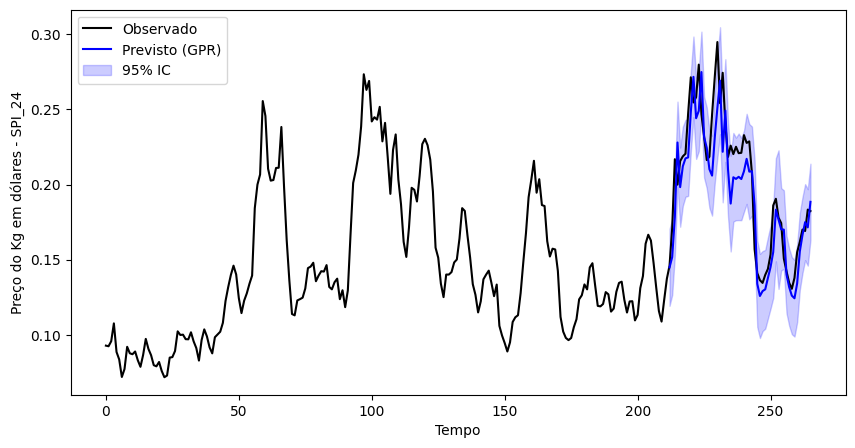

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic, WhiteKernel, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

for ii_SPI in [1, 2, 3, 6, 12, 24]:
    # Seleciona as features e target
    features = [f"SPI_{ii_SPI}", "Preco_Kg_Dolar_shift1", "Preco_Kg_Dolar_shift2", "Preco_Kg_Dolar_shift3", "Preco_Kg_Dolar_shift6", "Preco_Kg_Dolar_shift12"]
    X = df_merged[features].values
    y = df_merged["Preco_Kg_Dolar"].values

    # Remove linhas com NaN
    mask = ~pd.isnull(X).any(axis=1) & ~pd.isnull(y)
    X = X[mask]
    y = y[mask]

    # Separa treino e teste (20% para teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Define kernels conforme exemplo do scikit-learn
    long_term_trend_kernel = C(1.0, (1e-2, 1e2)) * RBF(length_scale=50.0, length_scale_bounds=(1.0, 1e3))
    seasonal_kernel = C(1.0, (1e-2, 1e2)) * ExpSineSquared(length_scale=1.0, periodicity=12.0, length_scale_bounds=(1e-2, 1e2), periodicity_bounds=(1.0, 100.0))
    irregularities_kernel = C(0.1, (1e-3, 1e1)) * RationalQuadratic(length_scale=1.0, alpha=1.0)
    noise_kernel = WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1e1))

    kernel = long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel

    # Ajusta o modelo
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
    gpr.fit(X_train, y_train)

    # Previsão
    y_pred, y_std = gpr.predict(X_test, return_std=True)

    # Avaliação
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE: {mse:.4f}, R2: {r2:.4f}")

    # Visualização
    plt.figure(figsize=(10,5))
    plt.plot(range(len(y)), y, 'k-', label="Observado")
    plt.plot(range(len(X_train), len(y)), y_pred, 'b-', label="Previsto (GPR)")
    plt.fill_between(range(len(X_train), len(y)), y_pred - 1.96*y_std, y_pred + 1.96*y_std, color='blue', alpha=0.2, label="95% IC")
    plt.xlabel("Tempo")
    plt.ylabel(f"Preço do Kg em dólares - SPI_{ii_SPI}")
    plt.legend()
    plt.show()

Repetição dos ajustes acima, mas considerando os índices SPI acumulados até um mês anterior - na variável SPI_shifted. Os resultados também são semelhantes ao ajuste inicial sem os índices SPI:

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run unequaled-lamb-305 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/5f72a89b1fea45e586b741cbdc84e2f9
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0003, R2: 0.8275


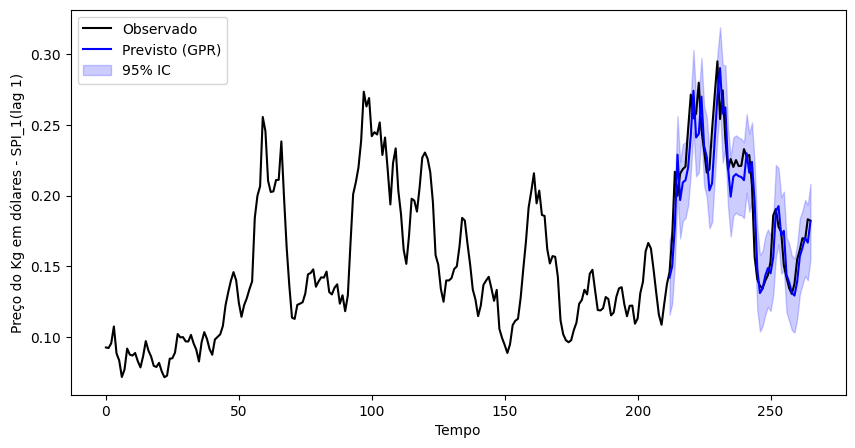

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run valuable-carp-202 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/d524915578d4489ea4833f1a85dff4cd
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0004, R2: 0.8194


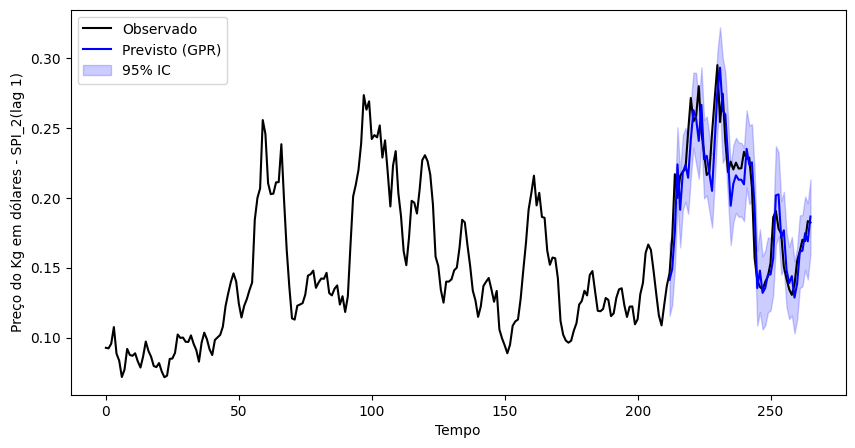

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run salty-duck-897 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/4aed61e823f44ed9aa7588f7ecab1cb7
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0003, R2: 0.8295


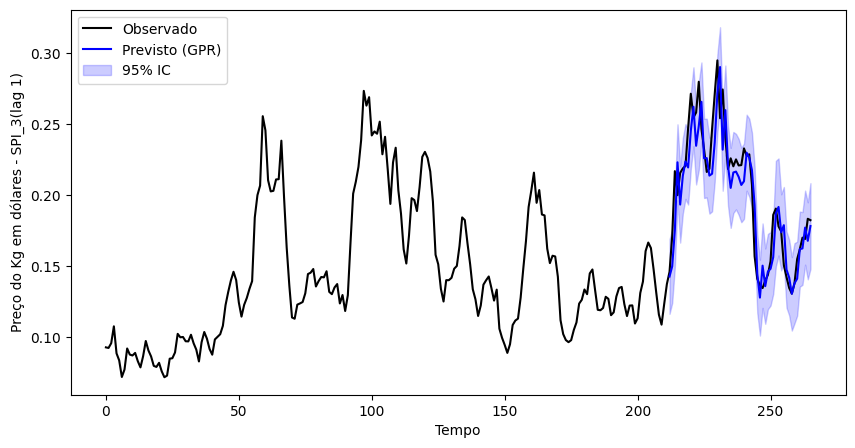

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site

🏃 View run indecisive-lynx-622 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/2bcce3d506204754bc27ed9257d97a0e
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0004, R2: 0.8066


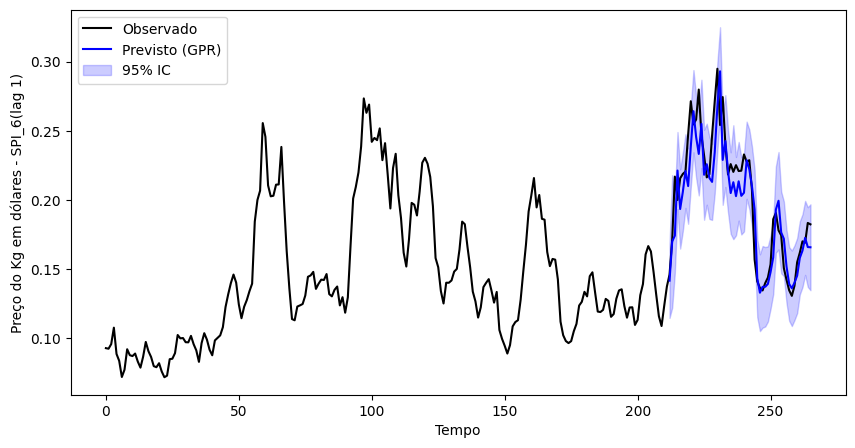

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/

🏃 View run resilient-carp-702 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/64dae0d78322496680122a00c7fc03eb
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0004, R2: 0.8080


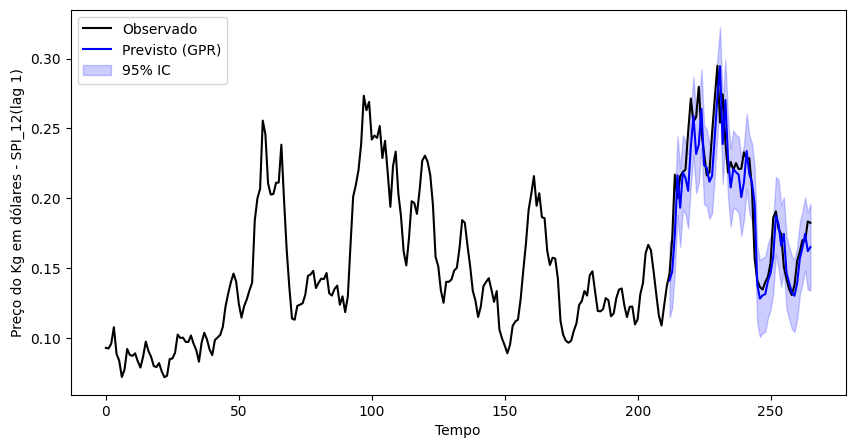

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run intelligent-wren-870 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/bb8b9364da1d46a5a0956d2bd49c6572
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0004, R2: 0.8120


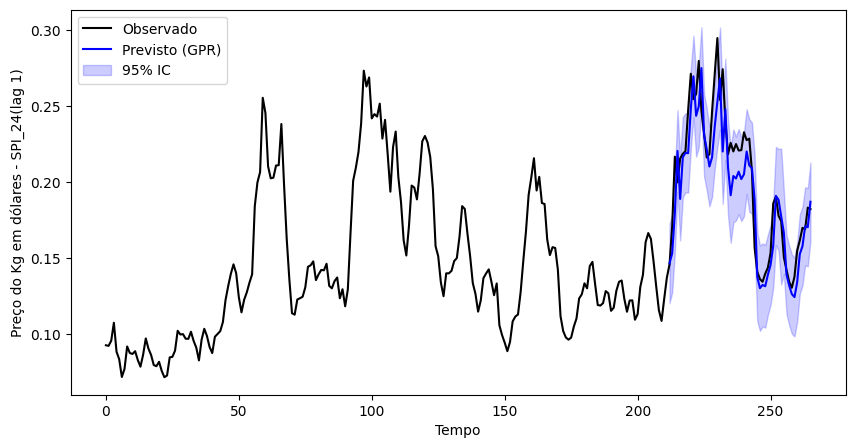

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic, WhiteKernel, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

for ii_SPI in [1, 2, 3, 6, 12, 24]:
    # Seleciona as features e target
    features = ["SPI_shifted", "Preco_Kg_Dolar_shift1", "Preco_Kg_Dolar_shift2", "Preco_Kg_Dolar_shift3", "Preco_Kg_Dolar_shift6", "Preco_Kg_Dolar_shift12"]
    df_merged["SPI_shifted"] = df_merged[f"SPI_{ii_SPI}"].shift(1)
    X = df_merged[features].values
    y = df_merged["Preco_Kg_Dolar"].values

    # Remove linhas com NaN
    mask = ~pd.isnull(X).any(axis=1) & ~pd.isnull(y)
    X = X[mask]
    y = y[mask]

    # Separa treino e teste (20% para teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Define kernels conforme exemplo do scikit-learn
    long_term_trend_kernel = C(1.0, (1e-2, 1e2)) * RBF(length_scale=50.0, length_scale_bounds=(1.0, 1e3))
    seasonal_kernel = C(1.0, (1e-2, 1e2)) * ExpSineSquared(length_scale=1.0, periodicity=12.0, length_scale_bounds=(1e-2, 1e2), periodicity_bounds=(1.0, 100.0))
    irregularities_kernel = C(0.1, (1e-3, 1e1)) * RationalQuadratic(length_scale=1.0, alpha=1.0)
    noise_kernel = WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1e1))

    kernel = long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel

    # Ajusta o modelo
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
    gpr.fit(X_train, y_train)

    # Previsão
    y_pred, y_std = gpr.predict(X_test, return_std=True)

    # Avaliação
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE: {mse:.4f}, R2: {r2:.4f}")

    # Visualização
    plt.figure(figsize=(10,5))
    plt.plot(range(len(y)), y, 'k-', label="Observado")
    plt.plot(range(len(X_train), len(y)), y_pred, 'b-', label="Previsto (GPR)")
    plt.fill_between(range(len(X_train), len(y)), y_pred - 1.96*y_std, y_pred + 1.96*y_std, color='blue', alpha=0.2, label="95% IC")
    plt.xlabel("Tempo")
    plt.ylabel(f"Preço do Kg em dólares - SPI_{ii_SPI}(lag 1)")
    plt.legend()
    plt.show()

Em uma última tentativa, procuramos identificar se há melhoria ao incluir índices SPI acumulados por diferentes meses e para alguns meses anteriores ao mês da predição.

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run melodic-owl-102 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/3d89a535c5e44fc3b643694b43000a53
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0013, R2: 0.3609


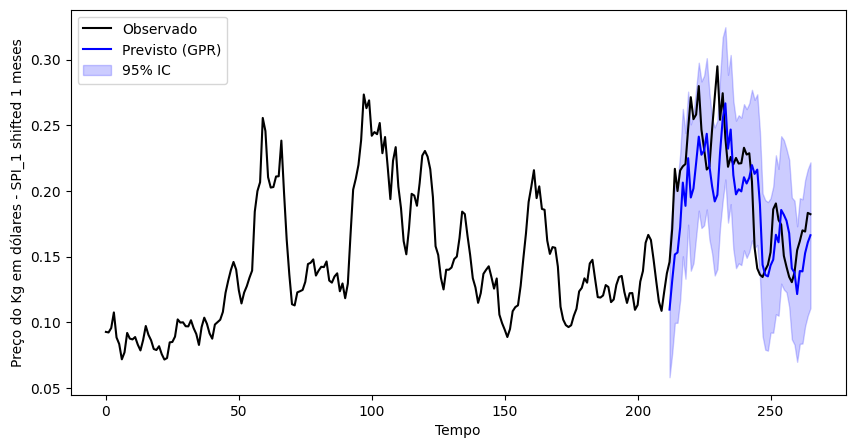

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run inquisitive-owl-404 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/c7059d7b4786469c95056f2f2949a470
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0022, R2: -0.0878


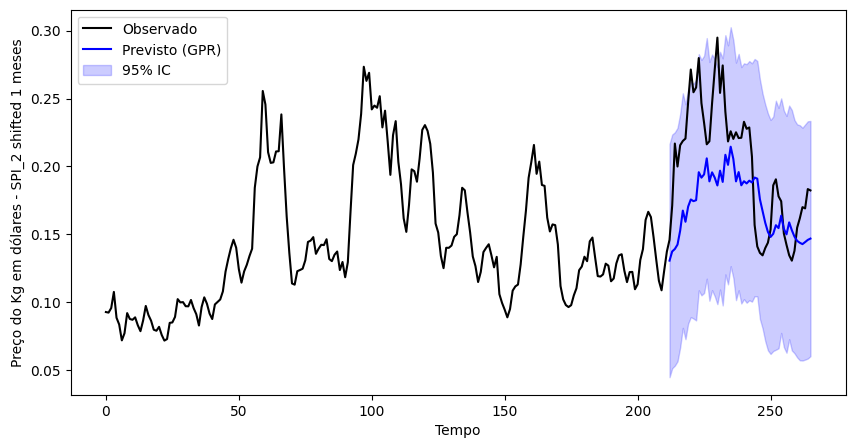

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/

🏃 View run fortunate-colt-730 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/cf81cf67caa44637bb40dbf81265ffd0
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0013, R2: 0.3583


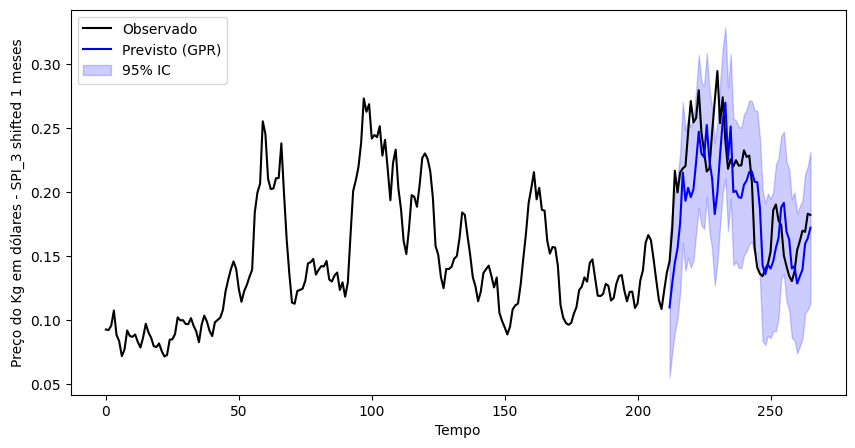

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/

🏃 View run orderly-panda-616 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/ce7b723fd7f34bc49147d40071375388
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0014, R2: 0.3317


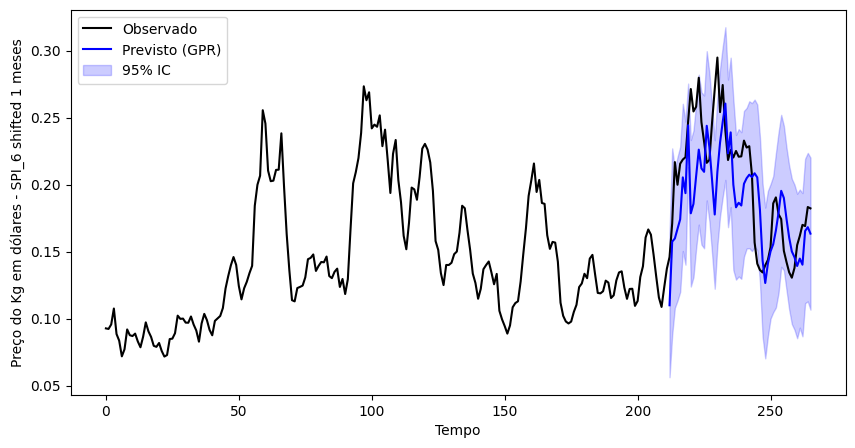

🏃 View run mercurial-asp-624 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/cf751ca0b21d4160a5c010c3b6b8580f
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0052, R2: -1.5728


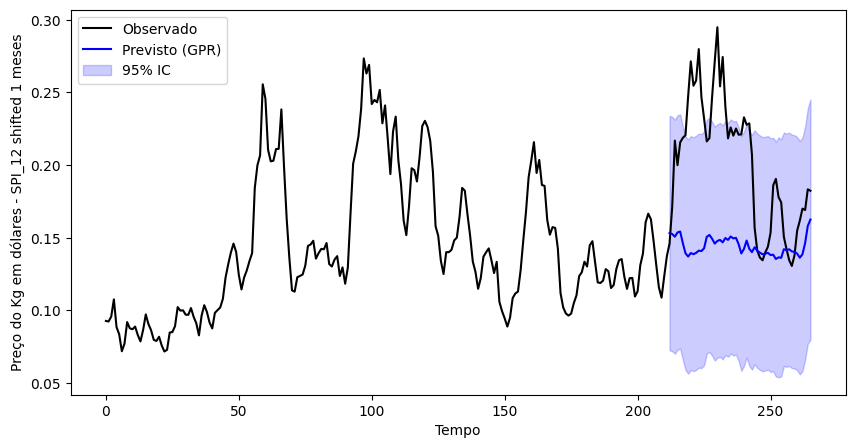

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run painted-mink-660 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/a15d3f92db43498880b636642f977325
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0016, R2: 0.2106


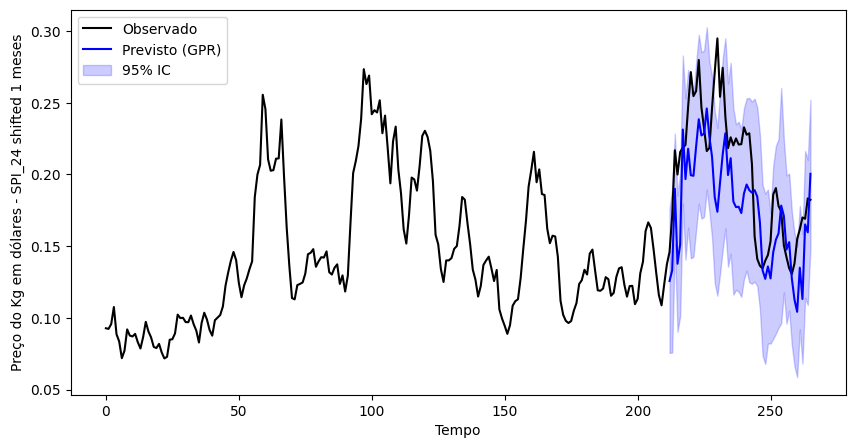

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/s

🏃 View run agreeable-fly-148 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/aa9c5f5dadc04cb48636f086a1efd9c4
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0014, R2: 0.3256


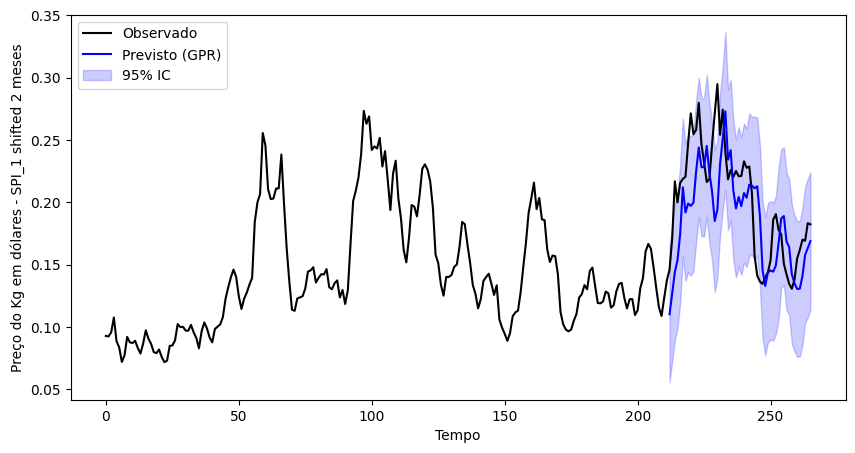

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run silent-rook-91 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/8fcec6cf9fbd458493c94bd552d5aae5
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0013, R2: 0.3389


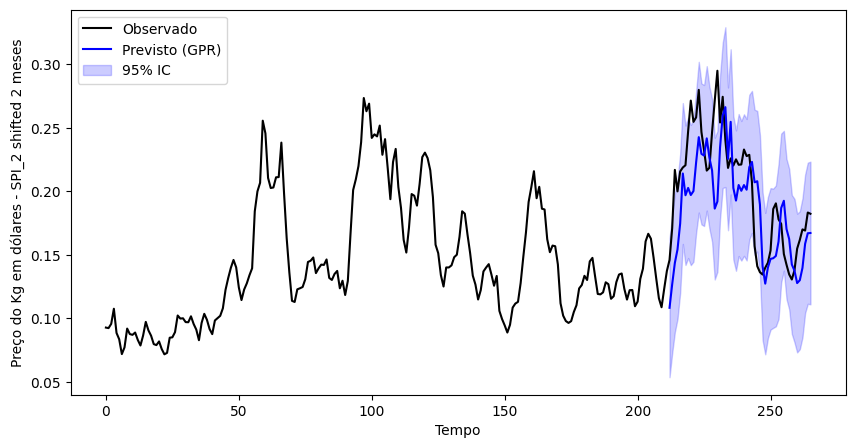

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/si

🏃 View run burly-toad-749 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/0380e765a0f149708662f7b2fd196132
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0013, R2: 0.3373


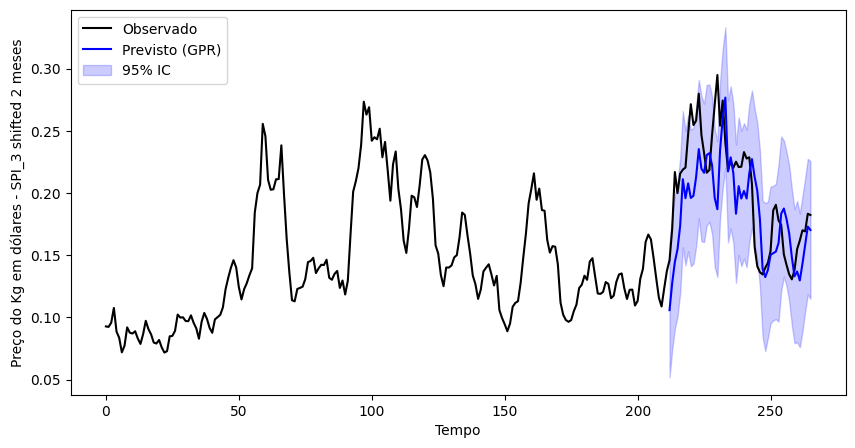

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run sneaky-wren-149 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/5a315116d82a47ffbbbb3f8975cbb572
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0013, R2: 0.3657


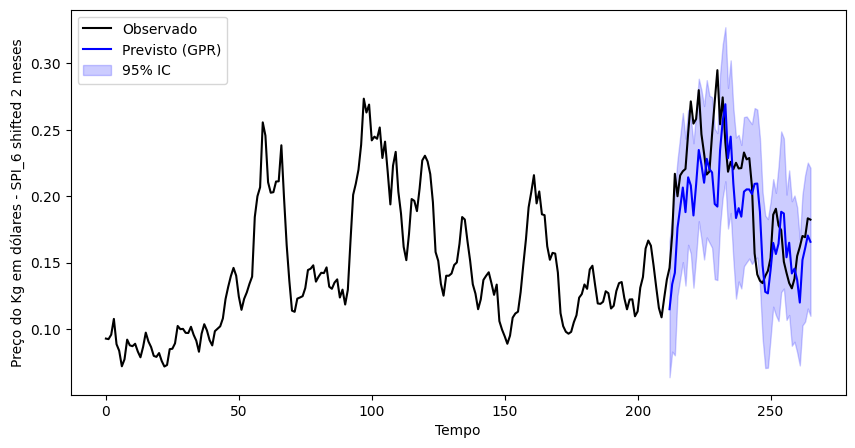

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run chill-dolphin-15 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/0a158e7bd8d54e018263a4d6d2bd1421
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0015, R2: 0.2599


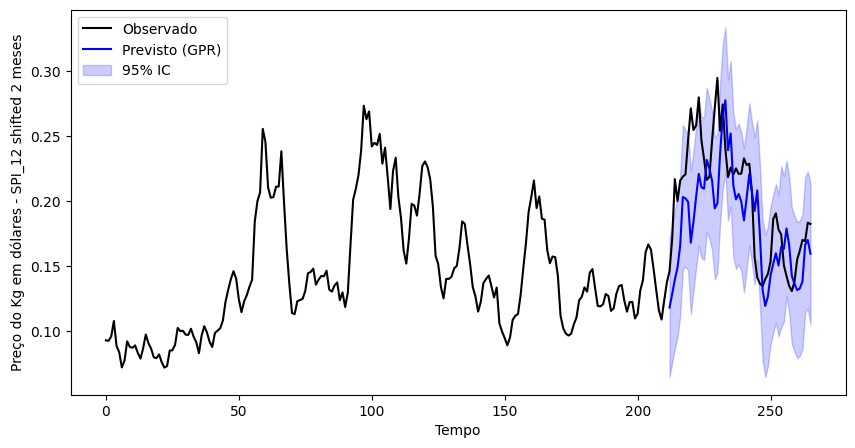

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run unique-snipe-867 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/bebc295c1e55461089145bdc599e12b5
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0014, R2: 0.2947


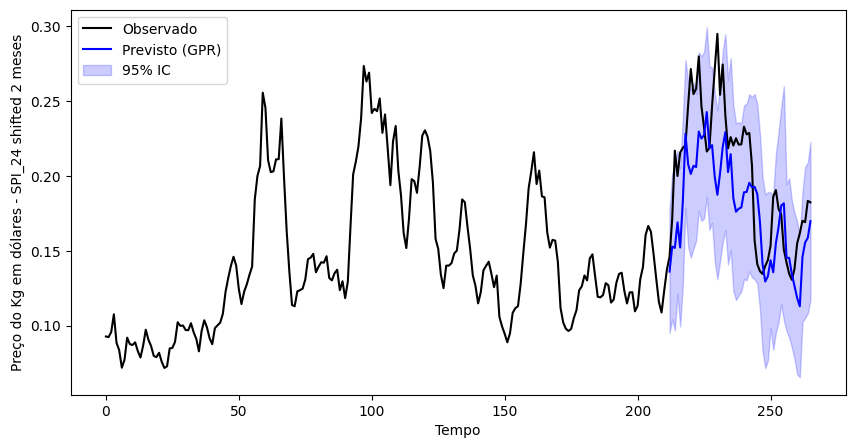

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run luminous-doe-622 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/642905e908594915a2feb611d1d42db2
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0014, R2: 0.3191


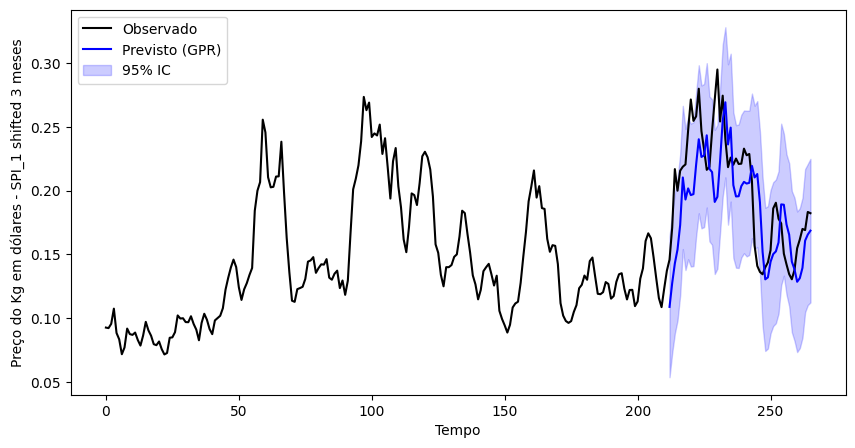

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run funny-owl-494 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/b6b6365b04284c15ad8504cbf80ec32d
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0014, R2: 0.3139


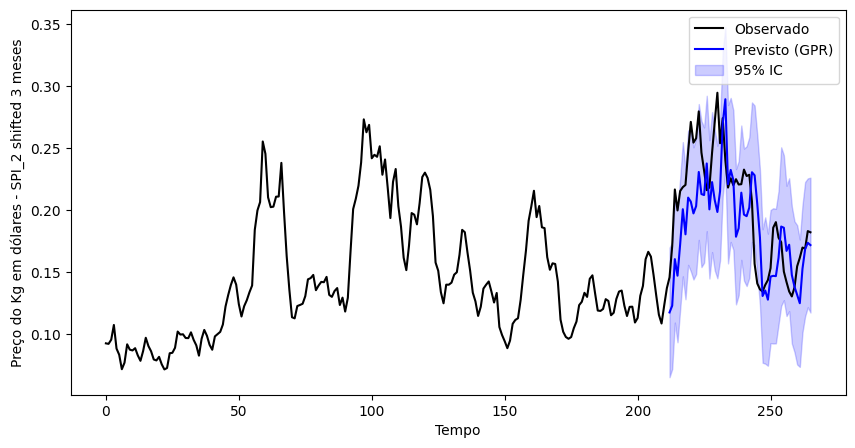

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/

🏃 View run industrious-gnat-990 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/cb82c63c112940f78bf698e8a47dbc24
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0013, R2: 0.3428


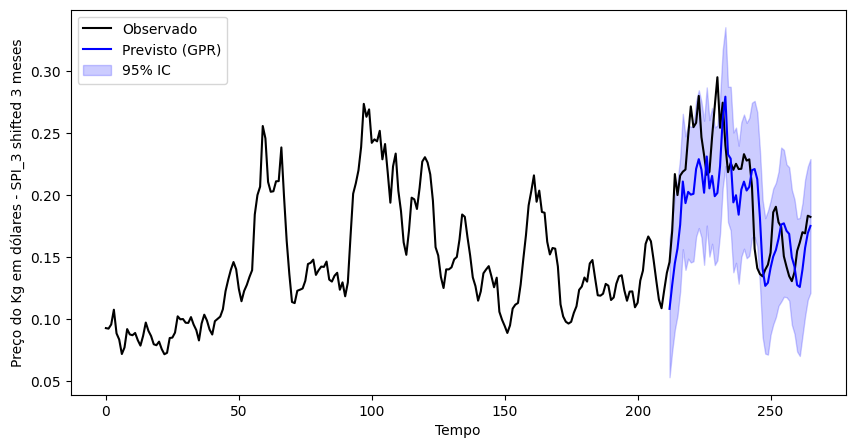

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run dazzling-ant-463 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/d1531477aea5434c8889459a0d5380c3
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0012, R2: 0.3907


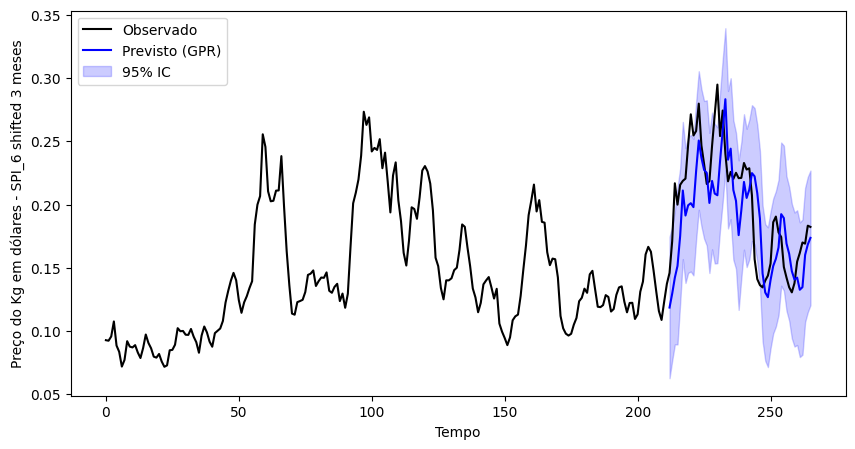

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run abundant-skink-694 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/551c010c7bf34cc8ad3a25fa6be5f203
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0013, R2: 0.3453


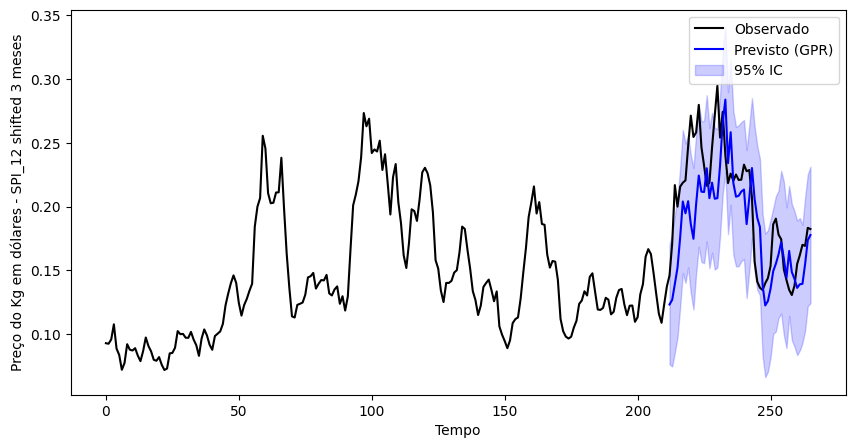

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run fun-hen-193 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/3a85d84aeffe4eecbf8ea1c7d65b1dd3
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0013, R2: 0.3827


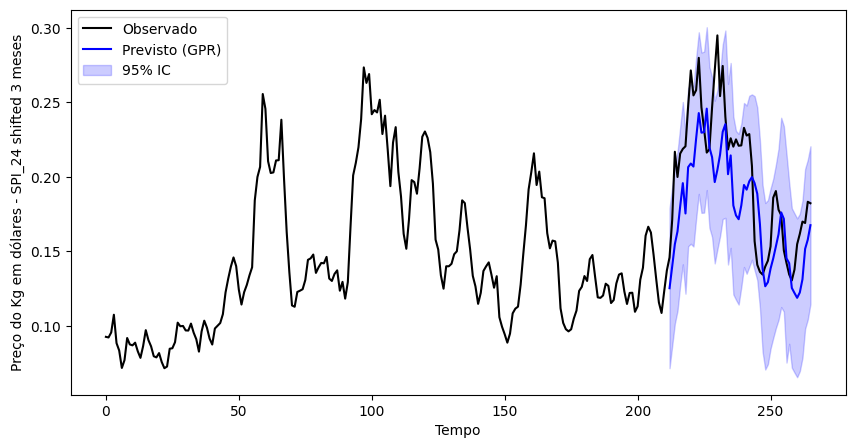

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run flawless-foal-778 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/4a4fc52bba14427590251419f6ddd1c8
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0013, R2: 0.3539


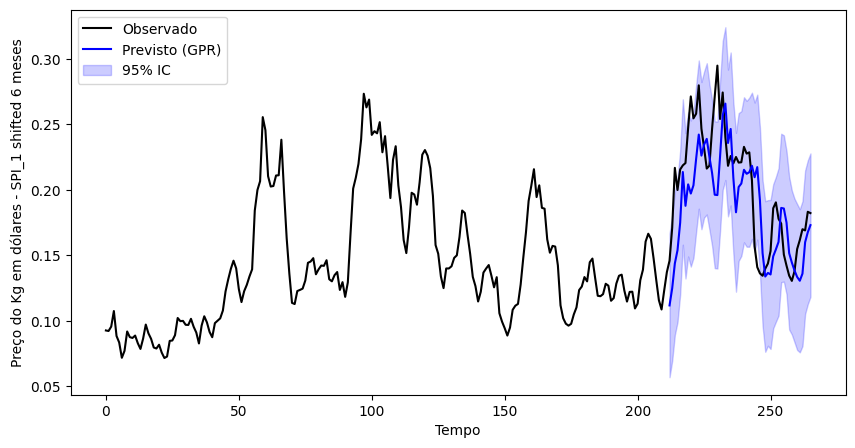

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run melodic-mink-274 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/42b742a1c72c40c9941cb65a732f8c45
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0013, R2: 0.3567


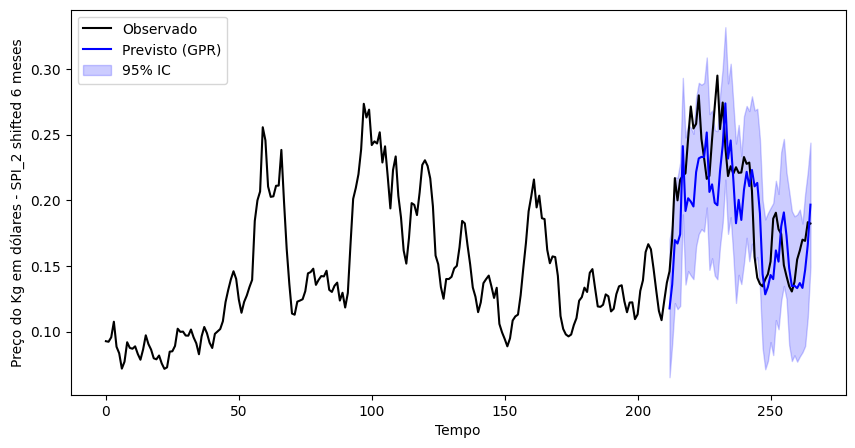

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-

🏃 View run thundering-bird-508 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/3a7b80c29f6b4800a100f2eb704d309e
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0014, R2: 0.2998


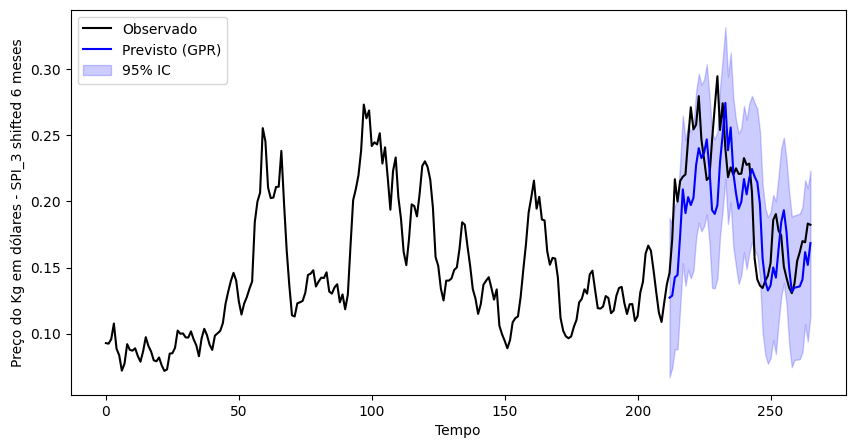

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run stately-skunk-752 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/ab242c5c165e4a97bb1e27f1a6cd0c94
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0016, R2: 0.2339


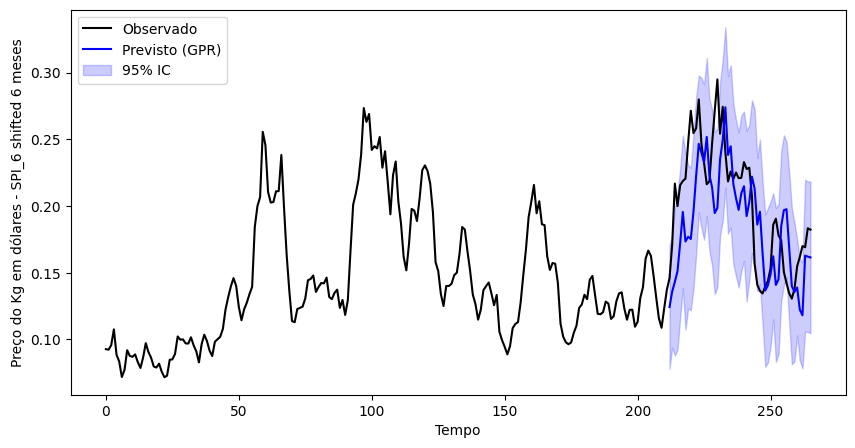

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run entertaining-owl-72 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/53c9cf40a57140fcaadd4eb5fcf256b8
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0014, R2: 0.2870


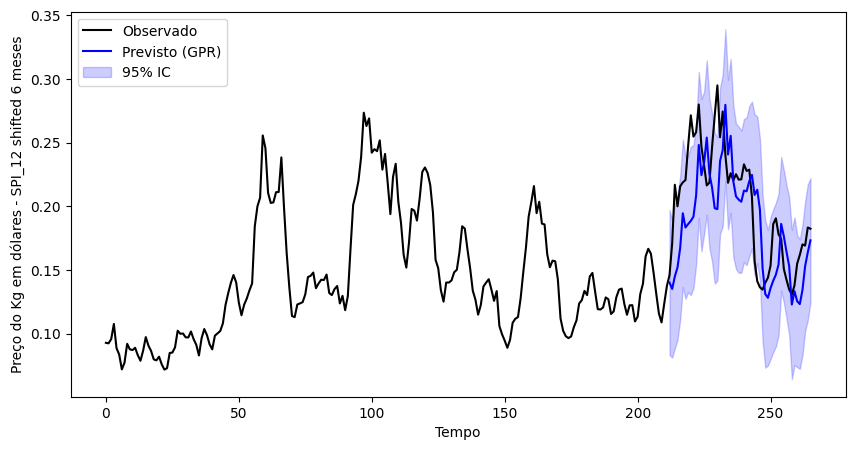

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run salty-stork-451 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/97239871c90345ee89d9ff8897e9ad1a
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0013, R2: 0.3526


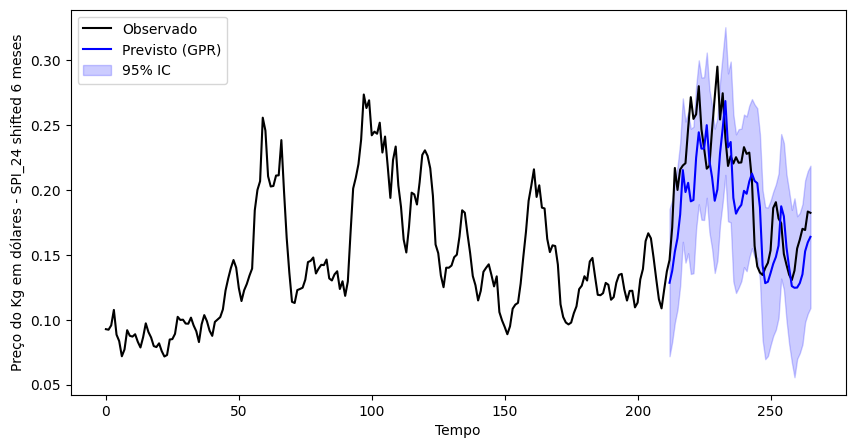

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic, WhiteKernel, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

for ii_shift in [1, 2, 3, 6]:
    for ii_acumulado in [1, 2, 3, 6, 12, 24]:
    # Seleciona as features e target
        features = ["SPI_{ii_acumulado}_shifted_{ii_shift}", "Preco_Kg_Dolar_shift3", "Preco_Kg_Dolar_shift6", "Preco_Kg_Dolar_shift12"]
        df_merged["SPI_{ii_acumulado}_shifted_{ii_shift}"] = df_merged[f"SPI_{ii_acumulado}"].shift(ii_shift)
        X = df_merged[features].values
        y = df_merged["Preco_Kg_Dolar"].values

        # Remove linhas com NaN
        mask = ~pd.isnull(X).any(axis=1) & ~pd.isnull(y)
        X = X[mask]
        y = y[mask]

        # Separa treino e teste (20% para teste)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Define kernels conforme exemplo do scikit-learn
        long_term_trend_kernel = C(1.0, (1e-2, 1e2)) * RBF(length_scale=50.0, length_scale_bounds=(1.0, 1e3))
        seasonal_kernel = C(1.0, (1e-2, 1e2)) * ExpSineSquared(length_scale=1.0, periodicity=12.0, length_scale_bounds=(1e-2, 1e2), periodicity_bounds=(1.0, 100.0))
        irregularities_kernel = C(0.1, (1e-3, 1e1)) * RationalQuadratic(length_scale=1.0, alpha=1.0)
        noise_kernel = WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1e1))

        kernel = long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel

        # Ajusta o modelo
        gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
        gpr.fit(X_train, y_train)

        # Previsão
        y_pred, y_std = gpr.predict(X_test, return_std=True)

        # Avaliação
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"MSE: {mse:.4f}, R2: {r2:.4f}")

        # Visualização
        plt.figure(figsize=(10,5))
        plt.plot(range(len(y)), y, 'k-', label="Observado")
        plt.plot(range(len(X_train), len(y)), y_pred, 'b-', label="Previsto (GPR)")
        plt.fill_between(range(len(X_train), len(y)), y_pred - 1.96*y_std, y_pred + 1.96*y_std, color='blue', alpha=0.2, label="95% IC")
        plt.xlabel("Tempo")
        plt.ylabel(f"Preço do Kg em dólares - SPI_{ii_acumulado} shifted {ii_shift} meses")
        plt.legend()
        plt.show()

### Agora tudo em log-retorno

Nenhum prestou então essa parte do notebook está pouco comentada.

Text(0, 0.5, 'Log-retorno do preço do Kg em dólares')

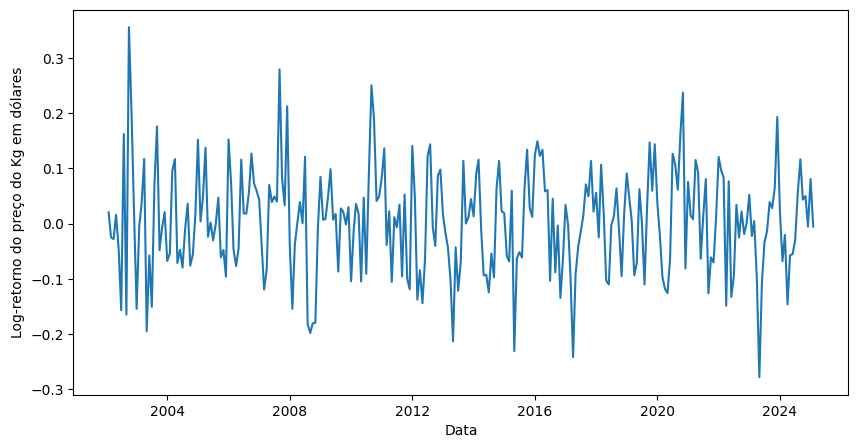

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_merged["Data"], df_merged["log_retorno_Preco_Kg_Dolar"])
plt.xlabel("Data")
plt.ylabel("Log-retorno do preço do Kg em dólares")

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__alpha is close to the specified upper bound 100000000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run powerful-rook-649 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/ce631810fe834403bebd4bf661dde370
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0071, R2: 0.1528


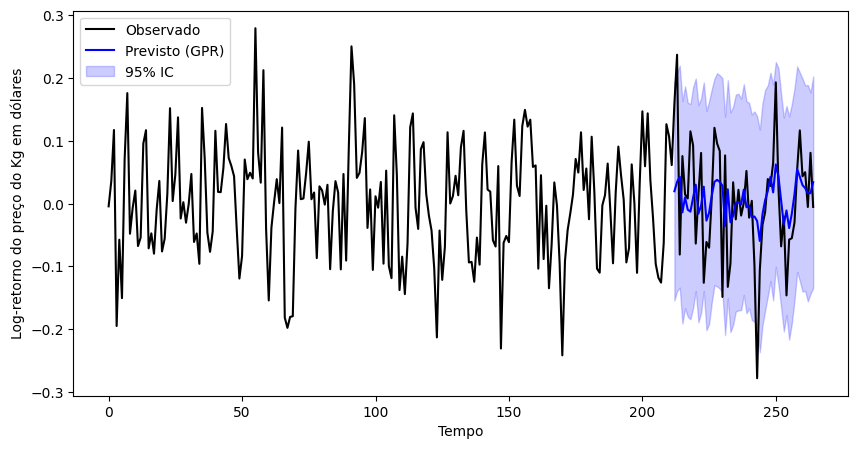

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic, WhiteKernel, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Seleciona as features e target
features = ["log_retorno_Preco_Kg_Dolar_shift1", "log_retorno_Preco_Kg_Dolar_shift2", "log_retorno_Preco_Kg_Dolar_shift3", "log_retorno_Preco_Kg_Dolar_shift6", "log_retorno_Preco_Kg_Dolar_shift12"]
X = df_merged[features].values
y = df_merged["log_retorno_Preco_Kg_Dolar"].values

# Remove linhas com NaN
mask = ~pd.isnull(X).any(axis=1) & ~pd.isnull(y)
X = X[mask]
y = y[mask]

# Separa treino e teste (20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define kernels conforme exemplo do scikit-learn
long_term_trend_kernel = C(1.0, (1e-9, 1e2)) * RBF(length_scale=50.0, length_scale_bounds=(1.0, 1e3))
seasonal_kernel = C(1.0, (2e-3, 1e2)) * ExpSineSquared(length_scale=1.0, periodicity=12.0, length_scale_bounds=(1e-2, 1e2), periodicity_bounds=(1.0, 10000.0))
irregularities_kernel = C(0.1, (3e-4, 1e1)) * RationalQuadratic(length_scale=1.0, alpha=1.0, alpha_bounds=(1e-05, 100_000_000.0))
noise_kernel = WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1e1))

kernel = long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel

# Ajusta o modelo
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
gpr.fit(X_train, y_train)

# Previsão
y_pred, y_std = gpr.predict(X_test, return_std=True)

# Avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}, R2: {r2:.4f}")

# Visualização
plt.figure(figsize=(10,5))
plt.plot(range(len(y)), y, 'k-', label="Observado")
plt.plot(range(len(X_train), len(y)), y_pred, 'b-', label="Previsto (GPR)")
plt.fill_between(range(len(X_train), len(y)), y_pred - 1.96*y_std, y_pred + 1.96*y_std, color='blue', alpha=0.2, label="95% IC")
plt.xlabel("Tempo")
plt.ylabel("Log-retorno do preço do Kg em dólares")
plt.legend()
plt.show()

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run legendary-tern-390 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/1d08e3083db045619abaea49d2687e1d
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0077, R2: 0.0873


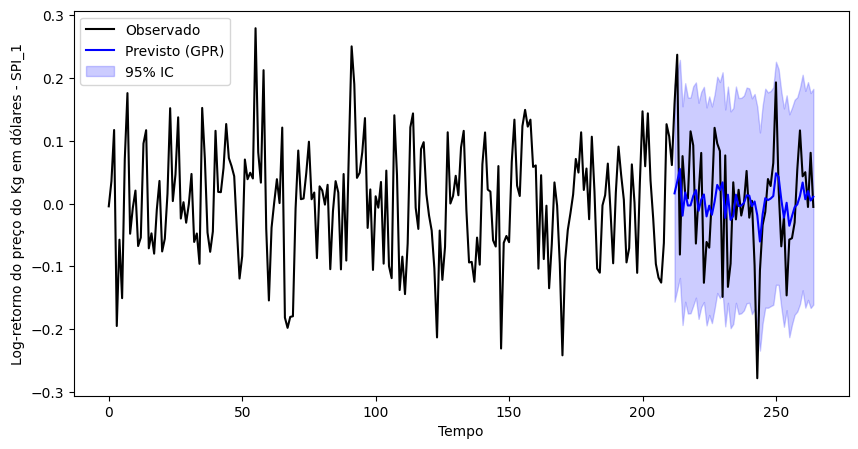

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k2__length_scale is close to the specified lower bound 1.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/sit

🏃 View run amusing-ant-593 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/19de9f46ccc040c7b422a20b6834c254
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0085, R2: -0.0150


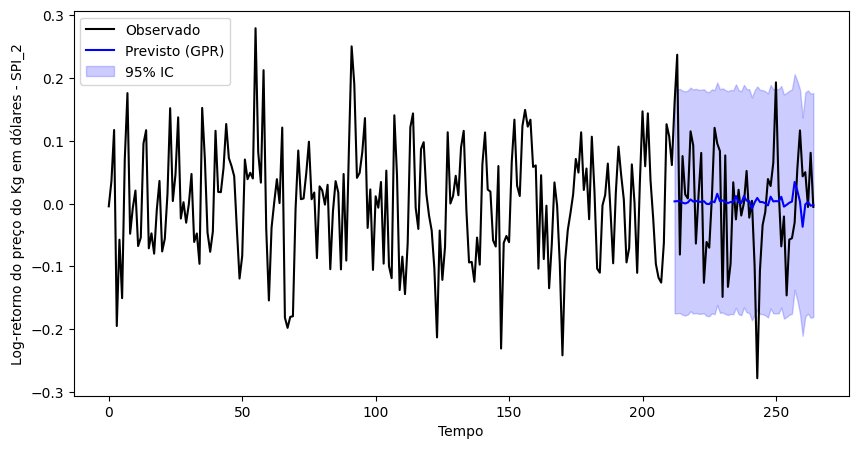

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run able-dove-245 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/c667ca3aa25c4d39bb710433cae0d918
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0086, R2: -0.0190


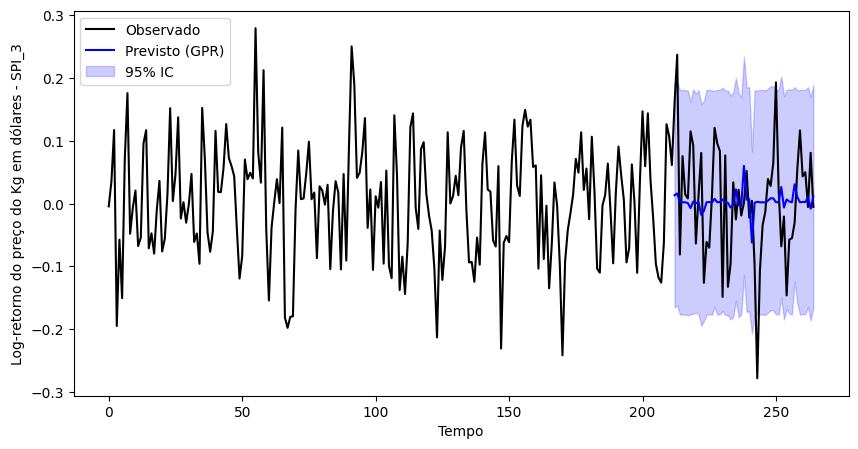

🏃 View run dazzling-snake-46 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/715f9e6a688541198ffc3a91b99e0804
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0091, R2: -0.0803


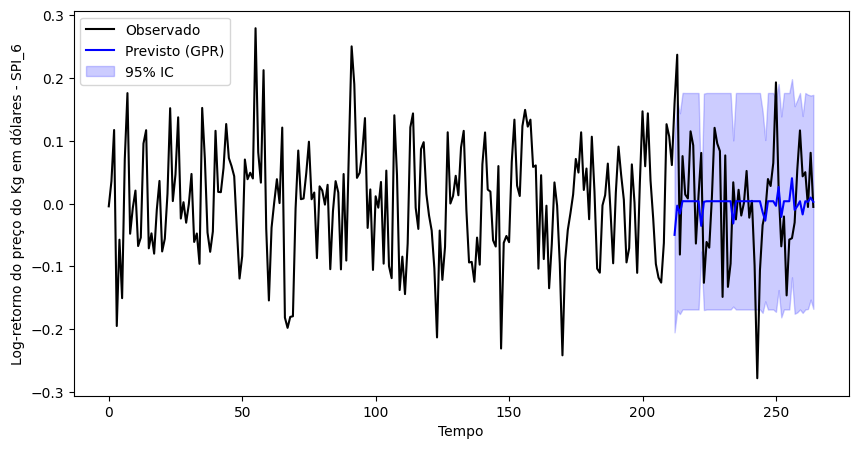

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run caring-mouse-835 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/71cfb9c5418a4657858a5058385ff93e
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0084, R2: -0.0005


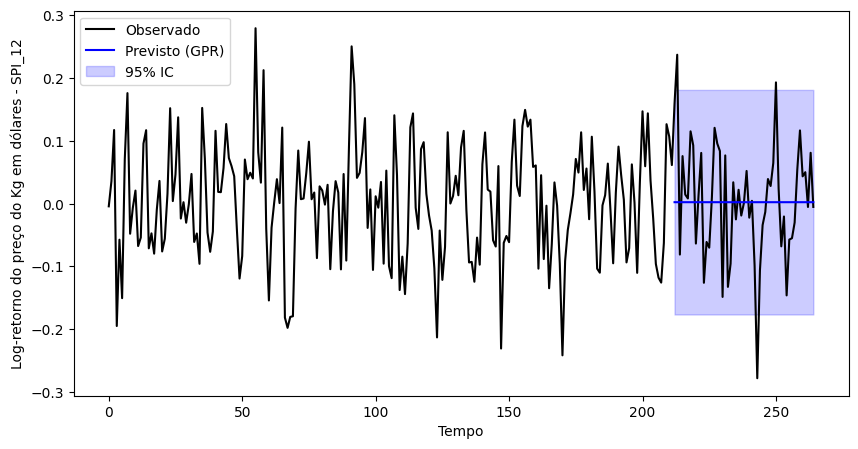

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k2__length_scale is close to the specified lower bound 1.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run resilient-hog-783 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/c200b4640643488c8f6799828b1d66be
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0084, R2: 0.0084


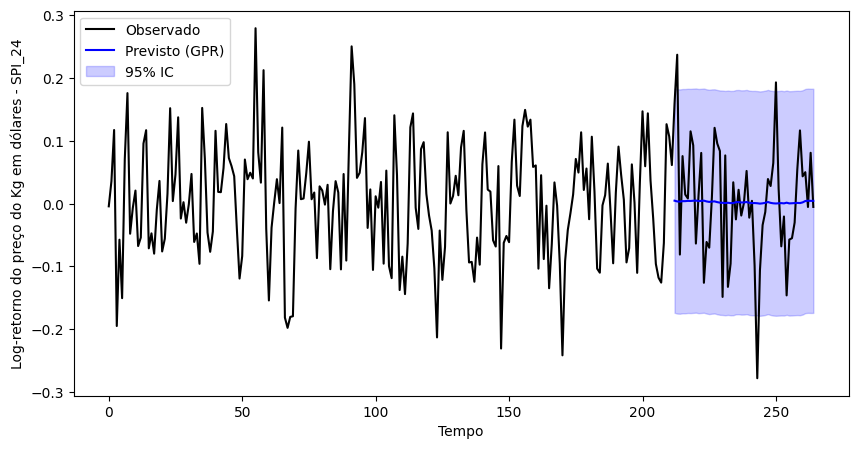

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic, WhiteKernel, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

for ii_SPI in [1, 2, 3, 6, 12, 24]:
    # Seleciona as features e target
    features = [f"SPI_{ii_SPI}", "log_retorno_Preco_Kg_Dolar_shift1", "log_retorno_Preco_Kg_Dolar_shift2", "log_retorno_Preco_Kg_Dolar_shift3", "log_retorno_Preco_Kg_Dolar_shift6", "log_retorno_Preco_Kg_Dolar_shift12"]
    X = df_merged[features].values
    y = df_merged["log_retorno_Preco_Kg_Dolar"].values

    # Remove linhas com NaN
    mask = ~pd.isnull(X).any(axis=1) & ~pd.isnull(y)
    X = X[mask]
    y = y[mask]

    # Separa treino e teste (20% para teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Define kernels conforme exemplo do scikit-learn
    long_term_trend_kernel = C(1.0, (1e-2, 1e2)) * RBF(length_scale=50.0, length_scale_bounds=(1.0, 1e3))
    seasonal_kernel = C(1.0, (1e-2, 1e2)) * ExpSineSquared(length_scale=1.0, periodicity=12.0, length_scale_bounds=(1e-2, 1e2), periodicity_bounds=(1.0, 100.0))
    irregularities_kernel = C(0.1, (1e-3, 1e1)) * RationalQuadratic(length_scale=1.0, alpha=1.0)
    noise_kernel = WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1e1))

    kernel = long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel

    # Ajusta o modelo
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
    gpr.fit(X_train, y_train)

    # Previsão
    y_pred, y_std = gpr.predict(X_test, return_std=True)

    # Avaliação
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE: {mse:.4f}, R2: {r2:.4f}")

    # Visualização
    plt.figure(figsize=(10,5))
    plt.plot(range(len(y)), y, 'k-', label="Observado")
    plt.plot(range(len(X_train), len(y)), y_pred, 'b-', label="Previsto (GPR)")
    plt.fill_between(range(len(X_train), len(y)), y_pred - 1.96*y_std, y_pred + 1.96*y_std, color='blue', alpha=0.2, label="95% IC")
    plt.xlabel("Tempo")
    plt.ylabel(f"Log-retorno do preço do Kg em dólares - SPI_{ii_SPI}")
    plt.legend()
    plt.show()

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run enthused-dolphin-214 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/45a1f3c348cc454d9b5efb09ef905172
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0084, R2: -0.0005


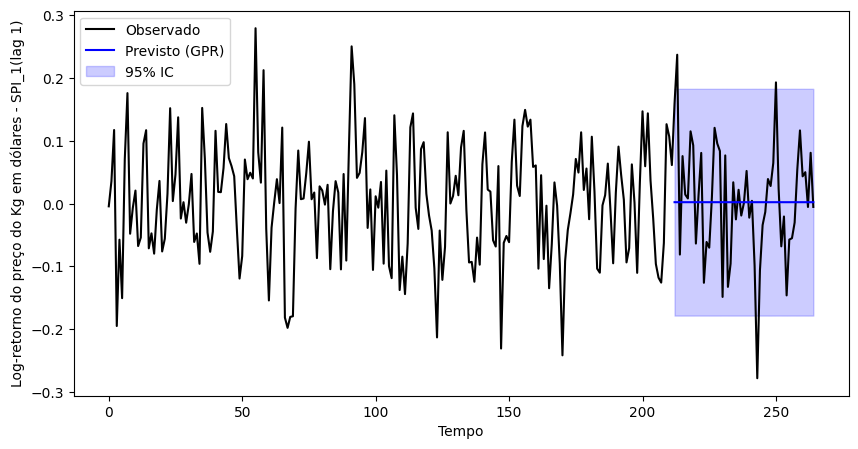

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k2__length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run delicate-trout-980 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/94165344cb0c447d8397543ef1a03b93
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0082, R2: 0.0234


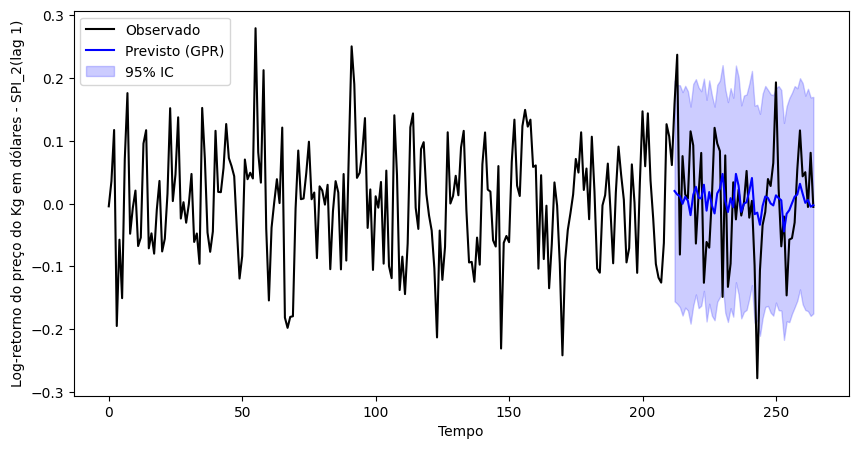

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k2__length_scale is close to the specified lower bound 1.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run upset-shad-136 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/a4bbe09df3d444078348fc5cb74c86fa
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451


/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:479: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


MSE: 0.0087, R2: -0.0354


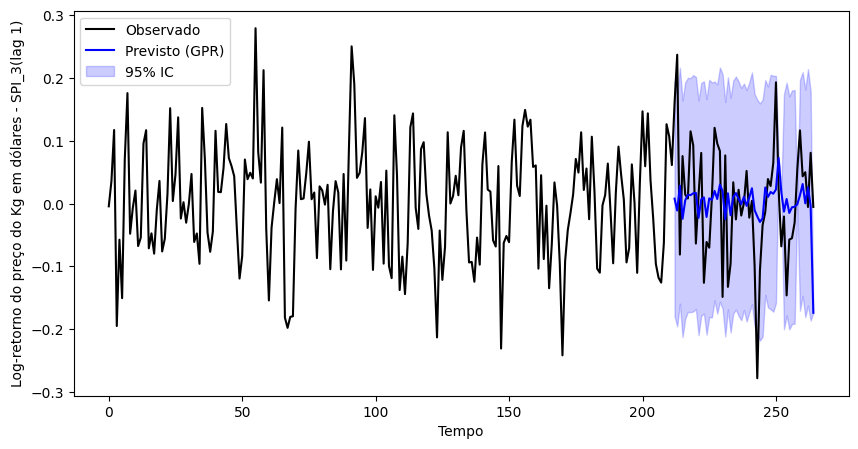

🏃 View run handsome-asp-873 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/fa82ac37074f4b05937c019f64f76a63
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0085, R2: -0.0142


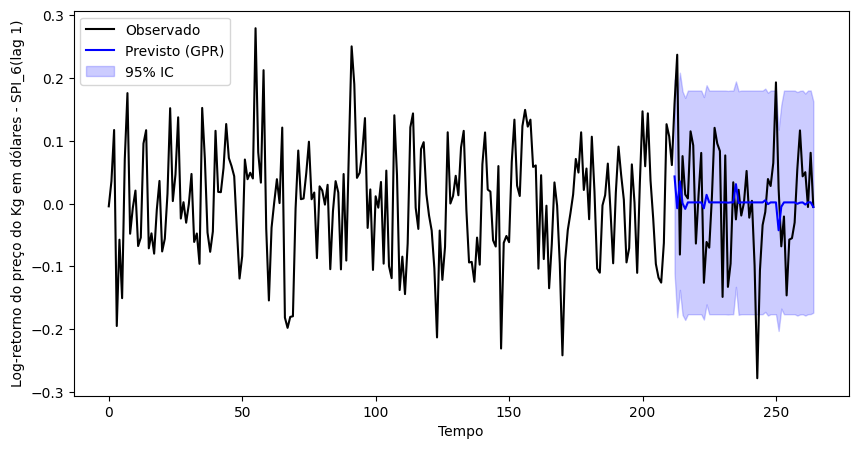

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__periodicity is close to the specified lower bound 1.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run industrious-lark-983 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/327753dff8cd45fbbae3bd6cda60107f
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0074, R2: 0.1209


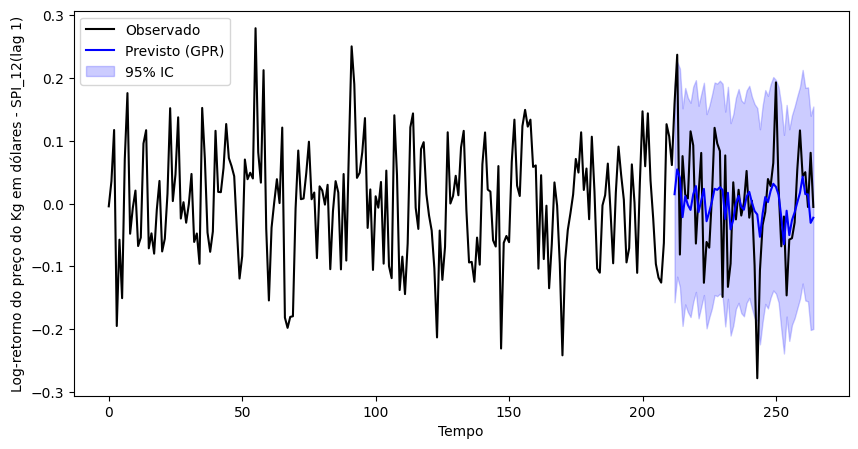

/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


🏃 View run blushing-shrew-196 at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451/runs/aed834cc0824441c80f7e15dd6520c3c
🧪 View experiment at: https://adb-2030397246806189.9.azuredatabricks.net/ml/experiments/4168581303966451
MSE: 0.0075, R2: 0.1133


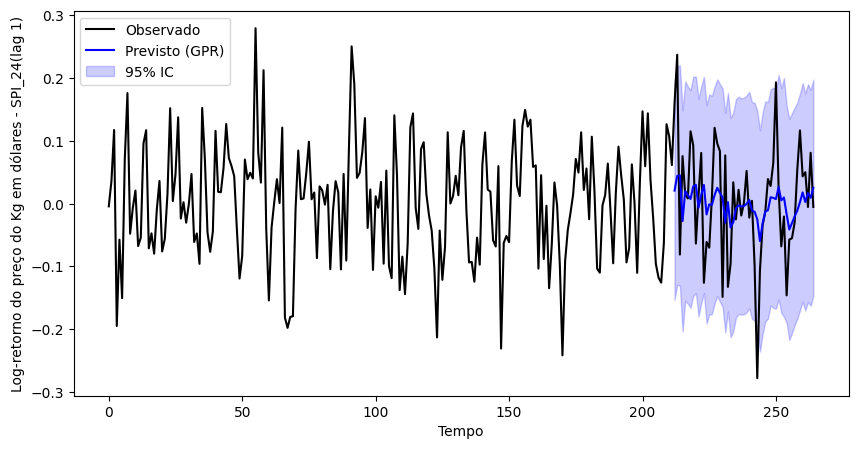

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic, WhiteKernel, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

for ii_SPI in [1, 2, 3, 6, 12, 24]:
    # Seleciona as features e target
    features = ["SPI_shifted", "log_retorno_Preco_Kg_Dolar_shift1", "log_retorno_Preco_Kg_Dolar_shift2", "log_retorno_Preco_Kg_Dolar_shift3", "log_retorno_Preco_Kg_Dolar_shift6", "log_retorno_Preco_Kg_Dolar_shift12"]
    df_merged["SPI_shifted"] = df_merged[f"SPI_{ii_SPI}"].shift(1)
    X = df_merged[features].values
    y = df_merged["log_retorno_Preco_Kg_Dolar"].values

    # Remove linhas com NaN
    mask = ~pd.isnull(X).any(axis=1) & ~pd.isnull(y)
    X = X[mask]
    y = y[mask]

    # Separa treino e teste (20% para teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Define kernels conforme exemplo do scikit-learn
    long_term_trend_kernel = C(1.0, (1e-2, 1e2)) * RBF(length_scale=50.0, length_scale_bounds=(1.0, 1e3))
    seasonal_kernel = C(1.0, (1e-2, 1e2)) * ExpSineSquared(length_scale=1.0, periodicity=12.0, length_scale_bounds=(1e-2, 1e2), periodicity_bounds=(1.0, 100.0))
    irregularities_kernel = C(0.1, (1e-3, 1e1)) * RationalQuadratic(length_scale=1.0, alpha=1.0)
    noise_kernel = WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1e1))

    kernel = long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel

    # Ajusta o modelo
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
    gpr.fit(X_train, y_train)

    # Previsão
    y_pred, y_std = gpr.predict(X_test, return_std=True)

    # Avaliação
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE: {mse:.4f}, R2: {r2:.4f}")

    # Visualização
    plt.figure(figsize=(10,5))
    plt.plot(range(len(y)), y, 'k-', label="Observado")
    plt.plot(range(len(X_train), len(y)), y_pred, 'b-', label="Previsto (GPR)")
    plt.fill_between(range(len(X_train), len(y)), y_pred - 1.96*y_std, y_pred + 1.96*y_std, color='blue', alpha=0.2, label="95% IC")
    plt.xlabel("Tempo")
    plt.ylabel(f"Log-retorno do preço do Kg em dólares - SPI_{ii_SPI}(lag 1)")
    plt.legend()
    plt.show()